AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

first_10_rows = df.head(10)
last_20_rows = df.tail(20)
info = df.info(buf=None)  
description = df.describe()

combined_info = pd.concat([first_10_rows, last_20_rows, description], axis=0, ignore_index=True)

print(combined_info)
print("\nDataset Information:")
print(info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
    PassengerId    Survived      Pclass  \
0      1.000000    0.000000    3.000000   
1      2.000000    1.000000    1.000000   
2      3.000000    1.000000    3.000000   
3      4.000000    1.000000    1.000000   
4      5.000000    0.000000  

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


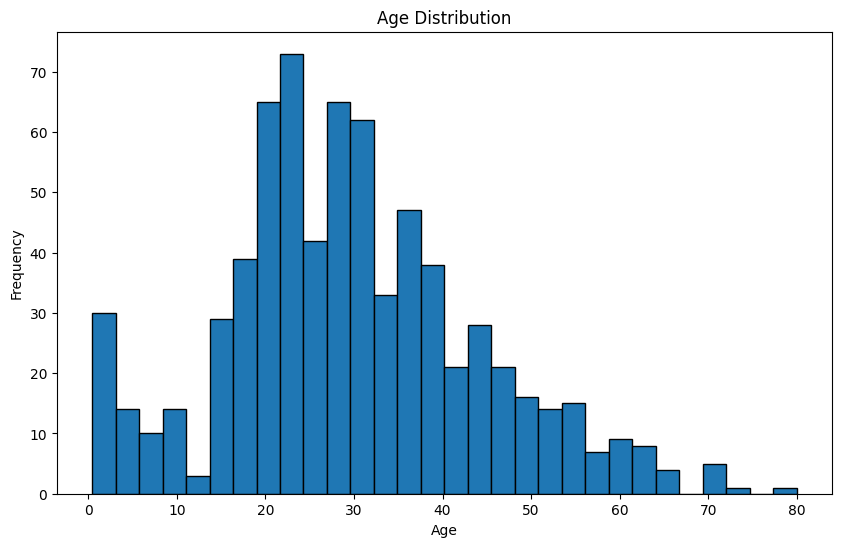


Cleaned dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = df[df['Survived'].isin([0, 1])]
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

print("\nCleaned dataset information:")
print(df.info())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average fare grouped by Pclass:
    Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


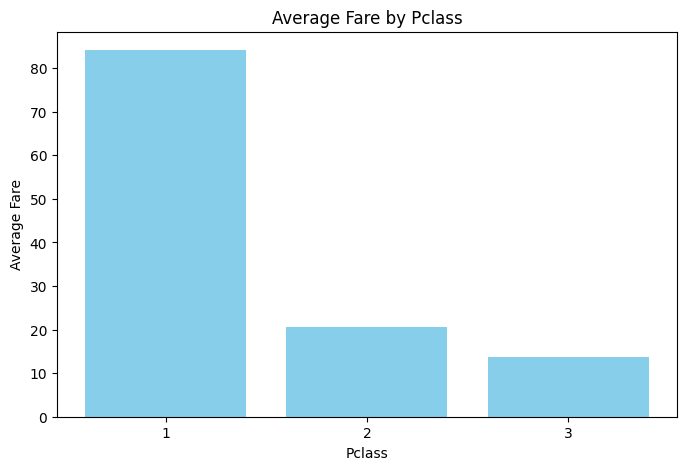


Average fare grouped by Sex:
       Sex       Fare
0  female  44.479818
1    male  25.523893


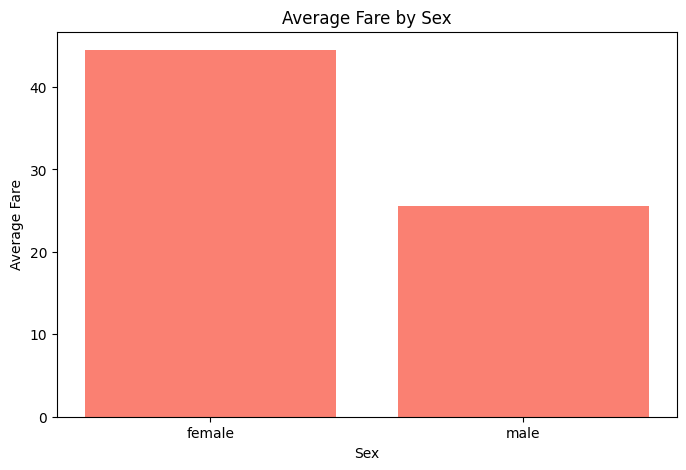

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

average_fare_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()
print("Average fare grouped by Pclass:\n", average_fare_pclass)

plt.figure(figsize=(8, 5))
plt.bar(average_fare_pclass['Pclass'], average_fare_pclass['Fare'], color='skyblue')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(average_fare_pclass['Pclass'])
plt.show()

average_fare_sex = df.groupby('Sex')['Fare'].mean().reset_index()
print("\nAverage fare grouped by Sex:\n", average_fare_sex)

plt.figure(figsize=(8, 5))
plt.bar(average_fare_sex['Sex'], average_fare_sex['Fare'], color='salmon')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(average_fare_sex['Sex'])
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

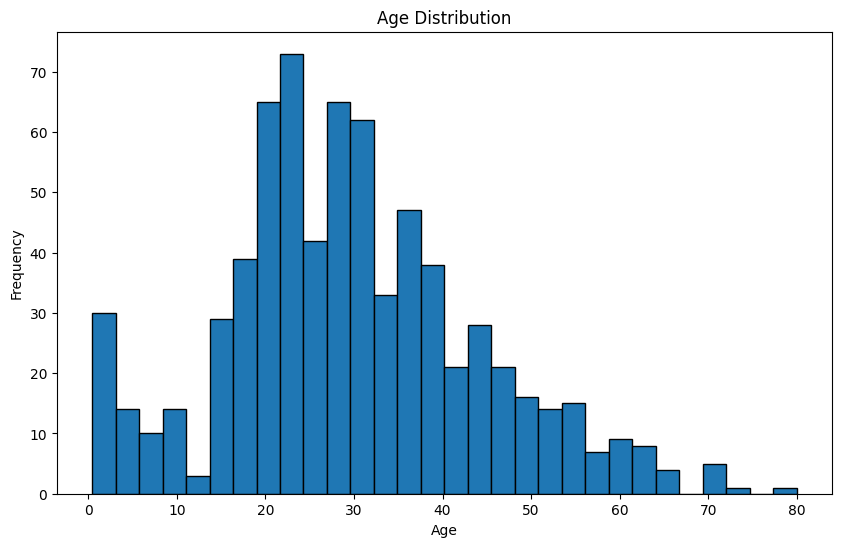

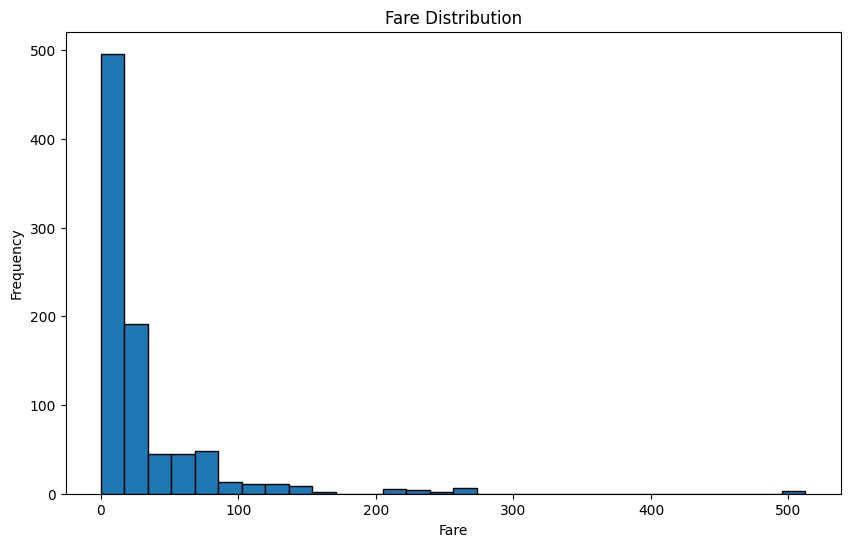

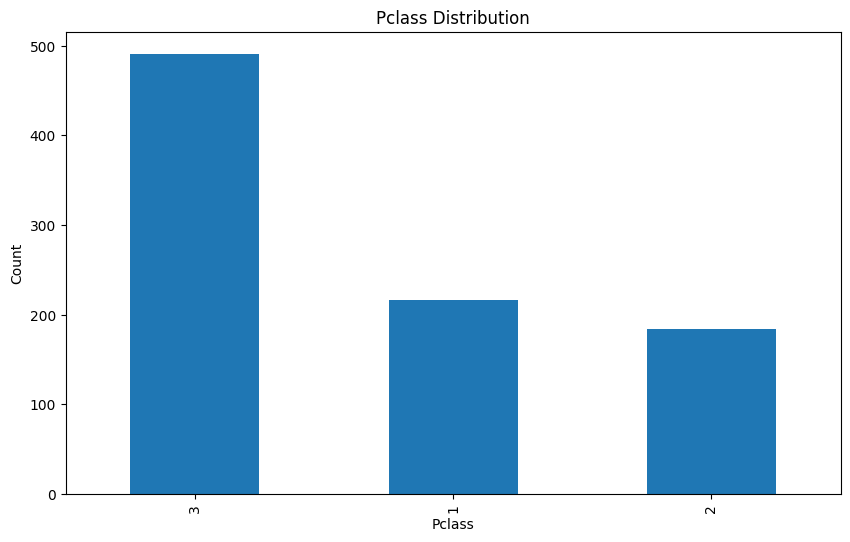

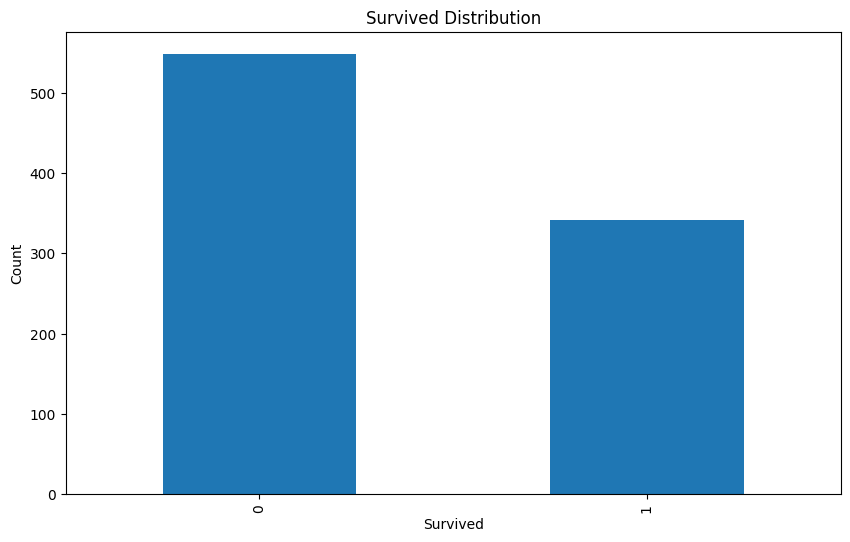

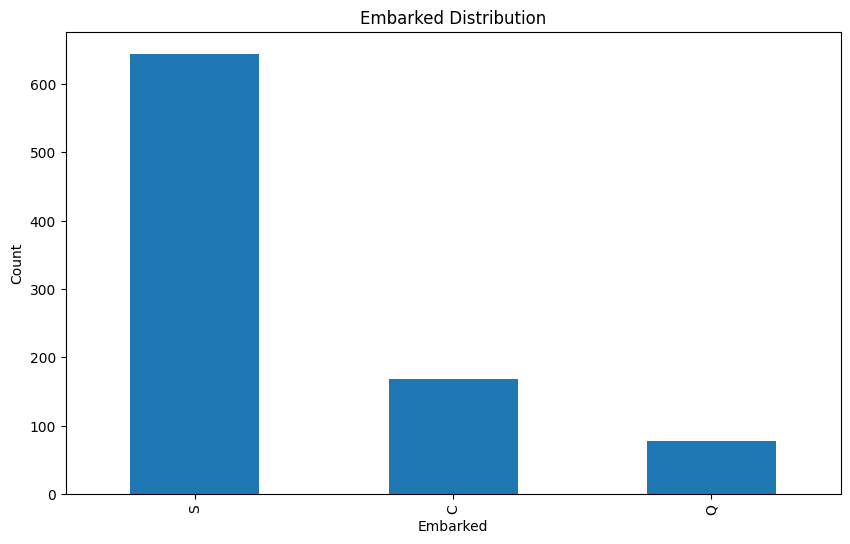

<Figure size 1000x600 with 0 Axes>

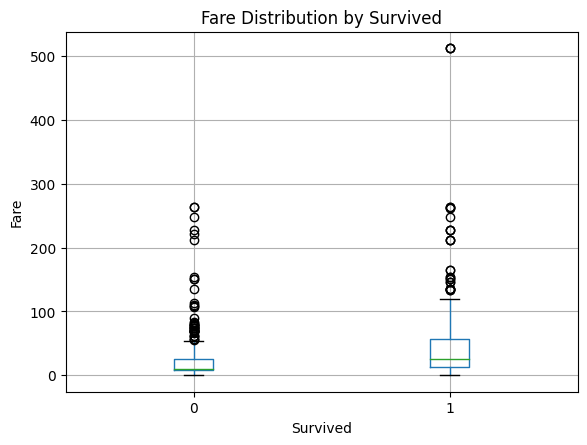

<Figure size 1000x600 with 0 Axes>

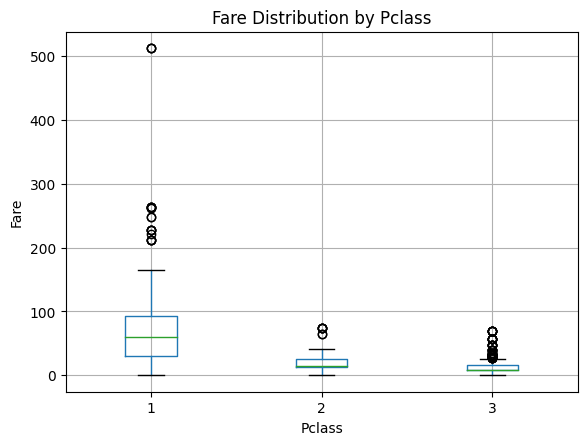

<Figure size 1000x600 with 0 Axes>

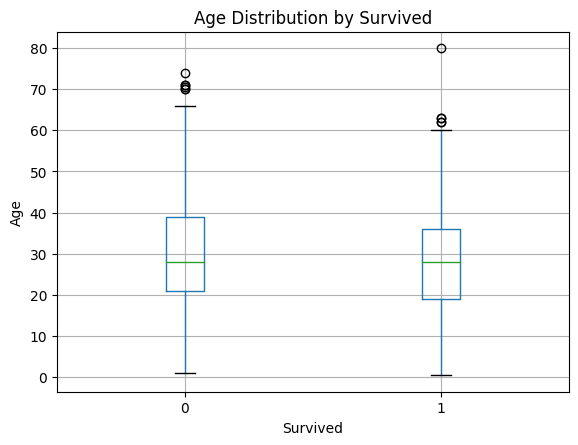

<Figure size 1000x600 with 0 Axes>

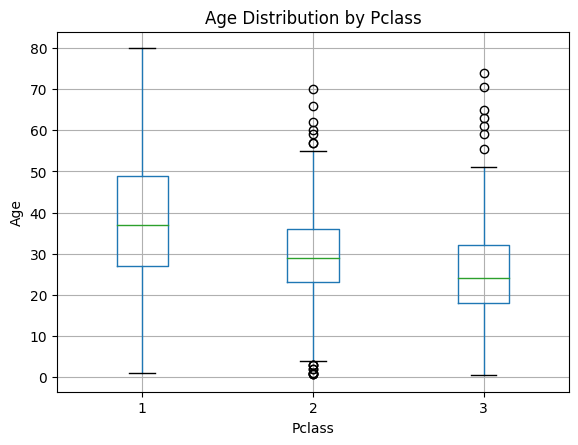

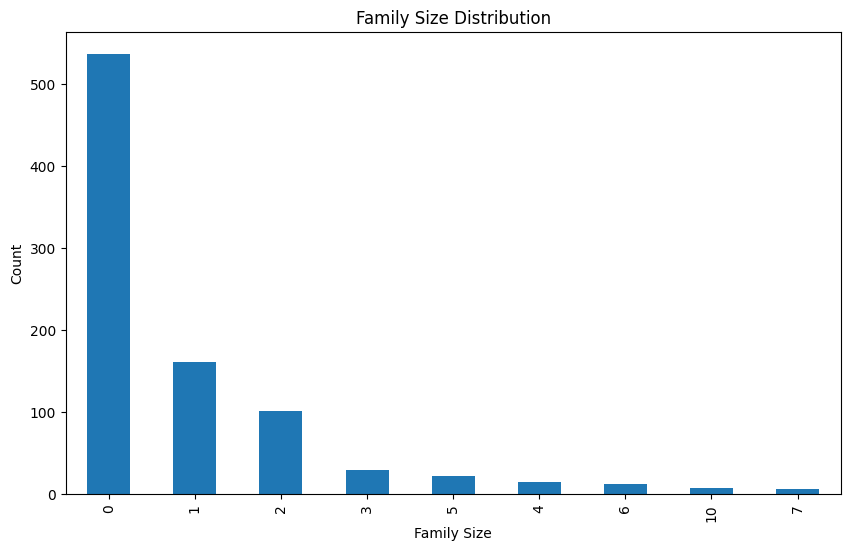

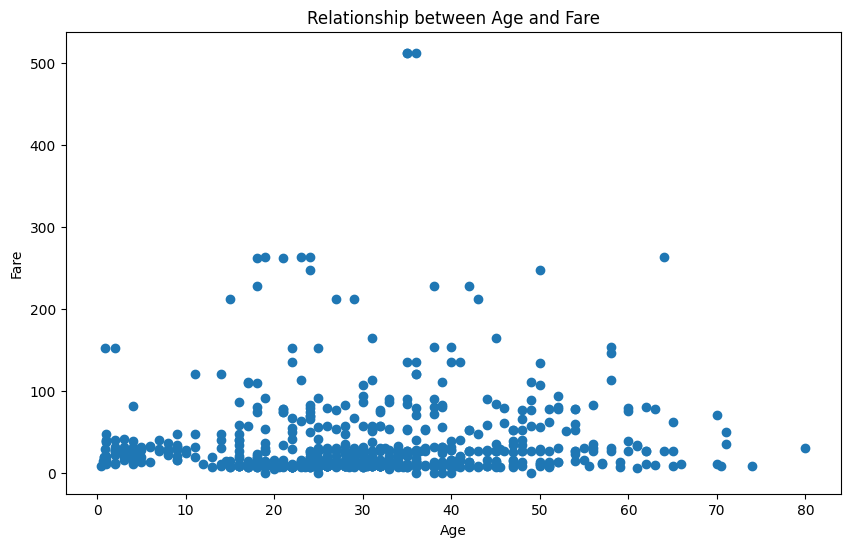

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Fare'].dropna(), bins=30, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column='Fare', by='Survived')
plt.title('Fare Distribution by Survived')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column='Fare', by='Pclass')
plt.title('Fare Distribution by Pclass')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Survived')
plt.title('Age Distribution by Survived')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Pclass')
plt.title('Age Distribution by Pclass')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(10, 6))
df['FamilySize'].value_counts().plot(kind='bar')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'])
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

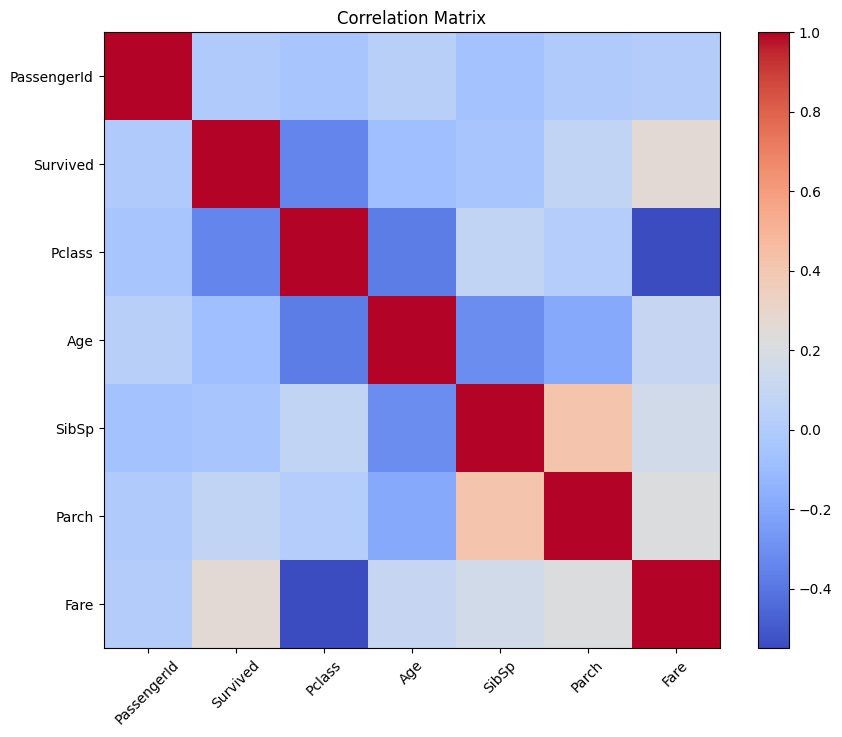

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.grid(False)
plt.show()
